# Pre-processing (state / organization Name) Regulatory data for WaDE upload.
- Purpose:  To preprocess the data into one master file for simple DataFrame creation and extraction.

In [9]:
# Needed Libraries / Modules

# ---- working with data ----
import os  # native operating system interaction
import numpy as np  # mathematical array manipulation
import pandas as pd  # data structure and data analysis
import geopandas as gpd  # geo-data structure and data analysis

# ---- visualization ----
import matplotlib.pyplot as plt  # plotting library
import seaborn as sns  # plotting library

# ---- API data retrieval ----
import requests  # http requests
import json  # JSON parse

# ---- Cleanup ----
import re  # string regular expression manipulation
from datetime import datetime  # date and time manipulation
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook
pd.set_option('display.float_format', lambda x: '%.5f' % x)  # suppress scientific notation in Pandas

In [10]:
# Working Directory
#print(os.getcwd()) # see the current working directory

# # set working directory, if need be
#workingDir = "/Volumes/SPACEX/GitHub/Arizona/Regulatory" # file location
#os.chdir(workingDir)
print(os.getcwd())

C:\Users\rjame\Documents\WSWC Documents\MappingStatesDataToWaDE2.0\Arizona\Regulatory


## Regulatory Area Data #1

In [11]:
# Input File
inputFile = "RawInputData/AMA_and_INA-shp/AMA_and_INA2.shp"
dfin1 = gpd.read_file(inputFile)
# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in dfin1:
    dfin1['WaDEUUID'] = "reAZ" + dfin1.index.astype(str)
    dfin1.to_csv('RawInputData/AMA_and_INA2.zip', compression=dict(method='zip', archive_name='AMA_and_INA2.csv'), index=False)

print(len(dfin1))
dfin1.head()

8


,OBJECTID,BASIN_NAME,NAME_ABBR,Shape_Leng,Shape_Area,geometry,WaDEUUID
0,1,SANTA CRUZ AMA,SCA,2.24518,0.17623,"POLYGON ((-111.19921 31.85820, -111.19889 31.8...",reAZ0
1,2,PRESCOTT AMA,PRE,1.93099,0.12240,"POLYGON ((-112.56133 34.72246, -112.56120 34.7...",reAZ1
2,3,HARQUAHALA INA,HAR,2.36600,0.19248,"POLYGON ((-113.30172 33.83494, -113.30158 33.8...",reAZ2
3,4,JOSEPH CITY INA,JCI,0.98562,0.04618,"POLYGON ((-110.27111 34.99601, -110.27092 34.9...",reAZ3
4,5,PHOENIX AMA,PHX,8.37192,1.35427,"POLYGON ((-112.06644 34.00006, -112.06605 34.0...",reAZ4


In [13]:
#Create Effective Date df
dfeffdate = pd.DataFrame()
dfeffdate["Name"] = dfin1["BASIN_NAME"]
Effective_Date = ["7/1/1994", "6/12/1980", "1/1/1981", "12/16/1974", "6/12/1980", "6/12/1980", "12/1/2022", "6/12/1980"]
dfeffdate["Effective_Date"] = Effective_Date

In [14]:
# create output for Regulatory Area #1 dataframe
df = pd.DataFrame()

# Data Assessment UUID
df['WaDEUUID'] = dfin1['WaDEUUID']

# Date Info
df['in_Date'] = "8/2/2023"
df['in_Year'] = "2023"

# Organization Info
df['in_OrganizationUUID'] = "AZre_O1"

# ReportingUnit Info
df['in_EPSGCodeCV'] = "4326"
df['in_ReportingUnitName'] = dfin1["BASIN_NAME"]
df['in_ReportingUnitNativeID'] = "az" + dfin1["OBJECTID"].astype(str)
df['in_ReportingUnitProductVersion'] = ""
df['in_ReportingUnitTypeCV'] = "Active Management Area"
df['in_ReportingUnitUpdateDate'] = "1/10/2023"
df['in_StateCV'] = "AZ"

# RegulatoryOverlay Info
df['in_OversightAgency'] = "Arizona Department of Water Resources"
df['in_RegulatoryDescription'] = "To safeguard the health, safety and economic welfare of the public by protecting, \
    conserving and enhancing Arizona's water supplies in a bold, thoughtful and innovative manner."
df['in_RegulatoryName'] = dfin1["BASIN_NAME"]
df['in_RegulatoryOverlayNativeID'] = dfin1["OBJECTID"]
df['in_RegulatoryStatusCV'] = "Active"
df['in_RegulatoryStatute'] = ""
df['in_RegulatoryStatuteLink'] =""
df['in_StatutoryEffectiveDate'] = dfeffdate["Effective_Date"]
df['in_StatutoryEndDate'] = ""
df['in_RegulatoryOverlayTypeCV'] = "Active Management Area"
df['in_WaterSourceTypeCV'] = "Groundwater"

df = df.drop_duplicates().reset_index(drop=True)
outdf1 = df.copy()
print(len(outdf1))
outdf1.head()

8


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV
0,reAZ0,8/2/2023,2023,AZre_O1,4326,SANTA CRUZ AMA,az1,,Active Management Area,1/10/2023,AZ,Arizona Department of Water Resources,"To safeguard the health, safety and economic w...",SANTA CRUZ AMA,1,Active,,,7/1/1994,,Active Management Area,Groundwater
1,reAZ1,8/2/2023,2023,AZre_O1,4326,PRESCOTT AMA,az2,,Active Management Area,1/10/2023,AZ,Arizona Department of Water Resources,"To safeguard the health, safety and economic w...",PRESCOTT AMA,2,Active,,,6/12/1980,,Active Management Area,Groundwater
2,reAZ2,8/2/2023,2023,AZre_O1,4326,HARQUAHALA INA,az3,,Active Management Area,1/10/2023,AZ,Arizona Department of Water Resources,"To safeguard the health, safety and economic w...",HARQUAHALA INA,3,Active,,,1/1/1981,,Active Management Area,Groundwater
3,reAZ3,8/2/2023,2023,AZre_O1,4326,JOSEPH CITY INA,az4,,Active Management Area,1/10/2023,AZ,Arizona Department of Water Resources,"To safeguard the health, safety and economic w...",JOSEPH CITY INA,4,Active,,,12/16/1974,,Active Management Area,Groundwater
4,reAZ4,8/2/2023,2023,AZre_O1,4326,PHOENIX AMA,az5,,Active Management Area,1/10/2023,AZ,Arizona Department of Water Resources,"To safeguard the health, safety and economic w...",PHOENIX AMA,5,Active,,,6/12/1980,,Active Management Area,Groundwater


## Regulatory Area #2

In [ ]:
# etc etc,

## Concatenate POD and POU Data.  Make needed changes

In [15]:
# Concatenate dataframes
frames = [outdf1] # list all out dataframes here
outdf = pd.concat(frames)
outdf = outdf.drop_duplicates().reset_index(drop=True).replace(np.nan, "")
print(len(outdf))

8


## Clean Data / data types

In [16]:
# Ensure Empty String / remove string value of "nan"

def ensureEmptyString(val):
    val = str(val).strip()
    if val == "" or val == " " or val == "nan" or pd.isnull(val):
        outString = ""
    else:
        outString = val
    return outString

In [17]:
outdf['in_ReportingUnitName'] = df.apply(lambda row: ensureEmptyString(row['in_ReportingUnitName']), axis=1)
outdf['in_ReportingUnitName'].unique()

array(['SANTA CRUZ AMA', 'PRESCOTT AMA', 'HARQUAHALA INA',
       'JOSEPH CITY INA', 'PHOENIX AMA', 'TUCSON AMA', 'DOUGLAS INA',
       'PINAL AMA'], dtype=object)

In [18]:
outdf['in_RegulatoryDescription'] = df.apply(lambda row: ensureEmptyString(row['in_RegulatoryDescription']), axis=1)
outdf['in_RegulatoryDescription'].unique()

array(["To safeguard the health, safety and economic welfare of the public by protecting,     conserving and enhancing Arizona's water supplies in a bold, thoughtful and innovative manner."],
      dtype=object)

In [19]:
outdf['in_RegulatoryName'] = df.apply(lambda row: ensureEmptyString(row['in_RegulatoryName']), axis=1)
outdf['in_RegulatoryName'].unique()

array(['SANTA CRUZ AMA', 'PRESCOTT AMA', 'HARQUAHALA INA',
       'JOSEPH CITY INA', 'PHOENIX AMA', 'TUCSON AMA', 'DOUGLAS INA',
       'PINAL AMA'], dtype=object)

In [20]:
#Update datatype of StatutoryEffectiveDate to fit WaDE 2.0 structure
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'], errors = 'coerce')
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'].dt.strftime('%m/%d/%Y'))
outdf['in_StatutoryEffectiveDate'].unique()

array(['1994-07-01T00:00:00.000000000', '1980-06-12T00:00:00.000000000',
       '1981-01-01T00:00:00.000000000', '1974-12-16T00:00:00.000000000',
       '2022-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [21]:
outdf

,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV
0,reAZ0,8/2/2023,2023,AZre_O1,4326,SANTA CRUZ AMA,az1,,Active Management Area,1/10/2023,AZ,Arizona Department of Water Resources,"To safeguard the health, safety and economic w...",SANTA CRUZ AMA,1,Active,,,1994-07-01,,Active Management Area,Groundwater
1,reAZ1,8/2/2023,2023,AZre_O1,4326,PRESCOTT AMA,az2,,Active Management Area,1/10/2023,AZ,Arizona Department of Water Resources,"To safeguard the health, safety and economic w...",PRESCOTT AMA,2,Active,,,1980-06-12,,Active Management Area,Groundwater
2,reAZ2,8/2/2023,2023,AZre_O1,4326,HARQUAHALA INA,az3,,Active Management Area,1/10/2023,AZ,Arizona Department of Water Resources,"To safeguard the health, safety and economic w...",HARQUAHALA INA,3,Active,,,1981-01-01,,Active Management Area,Groundwater
3,reAZ3,8/2/2023,2023,AZre_O1,4326,JOSEPH CITY INA,az4,,Active Management Area,1/10/2023,AZ,Arizona Department of Water Resources,"To safeguard the health, safety and economic w...",JOSEPH CITY INA,4,Active,,,1974-12-16,,Active Management Area,Groundwater
4,reAZ4,8/2/2023,2023,AZre_O1,4326,PHOENIX AMA,az5,,Active Management Area,1/10/2023,AZ,Arizona Department of Water Resources,"To safeguard the health, safety and economic w...",PHOENIX AMA,5,Active,,,1980-06-12,,Active Management Area,Groundwater
5,reAZ5,8/2/2023,2023,AZre_O1,4326,TUCSON AMA,az6,,Active Management Area,1/10/2023,AZ,Arizona Department of Water Resources,"To safeguard the health, safety and economic w...",TUCSON AMA,6,Active,,,1980-06-12,,Active Management Area,Groundwater
6,reAZ6,8/2/2023,2023,AZre_O1,4326,DOUGLAS INA,az7,,Active Management Area,1/10/2023,AZ,Arizona Department of Water Resources,"To safeguard the health, safety and economic w...",DOUGLAS INA,7,Active,,,2022-12-01,,Active Management Area,Groundwater
7,reAZ7,8/2/2023,2023,AZre_O1,4326,PINAL AMA,az8,,Active Management Area,1/10/2023,AZ,Arizona Department of Water Resources,"To safeguard the health, safety and economic w...",PINAL AMA,8,Active,,,1980-06-12,,Active Management Area,Groundwater


# Shapefile Data
- For attaching geometry to reporting unit info.

#### Regulatory Area #1 shapefile info

In [22]:
# Input File
shapeInputFile = "RawInputData/AMA_and_INA-shp/AMA_and_INA2.shp"
gdfin1 = gpd.read_file(shapeInputFile)
print(len(gdfin1))
gdfin1.head()

8


,OBJECTID,BASIN_NAME,NAME_ABBR,Shape_Leng,Shape_Area,geometry
0,1,SANTA CRUZ AMA,SCA,2.24518,0.17623,"POLYGON ((-111.19921 31.85820, -111.19889 31.8..."
1,2,PRESCOTT AMA,PRE,1.93099,0.12240,"POLYGON ((-112.56133 34.72246, -112.56120 34.7..."
2,3,HARQUAHALA INA,HAR,2.36600,0.19248,"POLYGON ((-113.30172 33.83494, -113.30158 33.8..."
3,4,JOSEPH CITY INA,JCI,0.98562,0.04618,"POLYGON ((-110.27111 34.99601, -110.27092 34.9..."
4,5,PHOENIX AMA,PHX,8.37192,1.35427,"POLYGON ((-112.06644 34.00006, -112.06605 34.0..."


<AxesSubplot: >

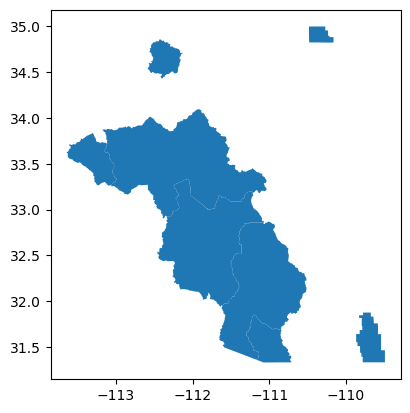

In [23]:
# plot shape info to map
gdfin1.plot()

In [24]:
# create output for Regulatory Area #1 dataframe
df = pd.DataFrame()

columnsList = ['in_ReportingUnitNativeID', 'geometry']
goutdf1 = pd.DataFrame(columns=columnsList, index=gdfin1.index)

goutdf1['in_ReportingUnitNativeID'] = "az" + gdfin1["OBJECTID"].astype(str)  # in_ReportingUnitNativeID needs to match source from above equivlaent datframe
goutdf1['geometry'] = gdfin1['geometry']
goutdf1 = goutdf1.drop_duplicates().reset_index(drop=True)
print(len(goutdf1))
goutdf1.head()

8


,in_ReportingUnitNativeID,geometry
0,az1,"POLYGON ((-111.19921 31.85820, -111.19889 31.8..."
1,az2,"POLYGON ((-112.56133 34.72246, -112.56120 34.7..."
2,az3,"POLYGON ((-113.30172 33.83494, -113.30158 33.8..."
3,az4,"POLYGON ((-110.27111 34.99601, -110.27092 34.9..."
4,az5,"POLYGON ((-112.06644 34.00006, -112.06605 34.0..."


#### Regulatory Area #2 shapefile info

In [25]:
# etc etc...

#### Concatenate goutdf shapefile info into single output

In [26]:
# Concatenate Basin & Subbasin DataFrames
frames = [goutdf1] # add geoutdf dataframes here
goutdf = pd.concat(frames).reset_index(drop=True)

print(len(goutdf))
goutdf.head()

8


,in_ReportingUnitNativeID,geometry
0,az1,"POLYGON ((-111.19921 31.85820, -111.19889 31.8..."
1,az2,"POLYGON ((-112.56133 34.72246, -112.56120 34.7..."
2,az3,"POLYGON ((-113.30172 33.83494, -113.30158 33.8..."
3,az4,"POLYGON ((-110.27111 34.99601, -110.27092 34.9..."
4,az5,"POLYGON ((-112.06644 34.00006, -112.06605 34.0..."


## Export Data

In [27]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(outdf.dtypes)

WaDEUUID                                  object
in_Date                                   object
in_Year                                   object
in_OrganizationUUID                       object
in_EPSGCodeCV                             object
in_ReportingUnitName                      object
in_ReportingUnitNativeID                  object
in_ReportingUnitProductVersion            object
in_ReportingUnitTypeCV                    object
in_ReportingUnitUpdateDate                object
in_StateCV                                object
in_OversightAgency                        object
in_RegulatoryDescription                  object
in_RegulatoryName                         object
in_RegulatoryOverlayNativeID               int64
in_RegulatoryStatusCV                     object
in_RegulatoryStatute                      object
in_RegulatoryStatuteLink                  object
in_StatutoryEffectiveDate         datetime64[ns]
in_StatutoryEndDate                       object
in_RegulatoryOverlay

In [28]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(goutdf.dtypes)

in_ReportingUnitNativeID      object
geometry                    geometry
dtype: object


In [31]:
# Export out to CSV.
outdf.to_csv('RawInputData/Pre_azMain.zip', compression=dict(method='zip', archive_name='Pre_Main.csv'), index=False)  # The output, save as a zip
goutdf.to_csv('RawInputData/P_Geometry.zip', compression=dict(method='zip', archive_name='P_Geometry.csv'), index=False)  # The output geometry.